# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (8, 6)

In [3]:
# Your code here

# Before reading you need to download the csv from: https://www.kaggle.com/ntnu-testimon/paysim1

data = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
round(data.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.0,179862.0,833883.0,855114.0,1100702.0,1224996.0,0.0,0.0
std,142.0,603858.0,2888243.0,2924049.0,3399180.0,3674129.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13390.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,239.0,74872.0,14208.0,0.0,132706.0,214661.0,0.0,0.0
75%,335.0,208721.0,107315.0,144258.0,943037.0,1111909.0,0.0,0.0
max,743.0,92445517.0,59585040.0,49585040.0,356015889.0,356179279.0,1.0,1.0


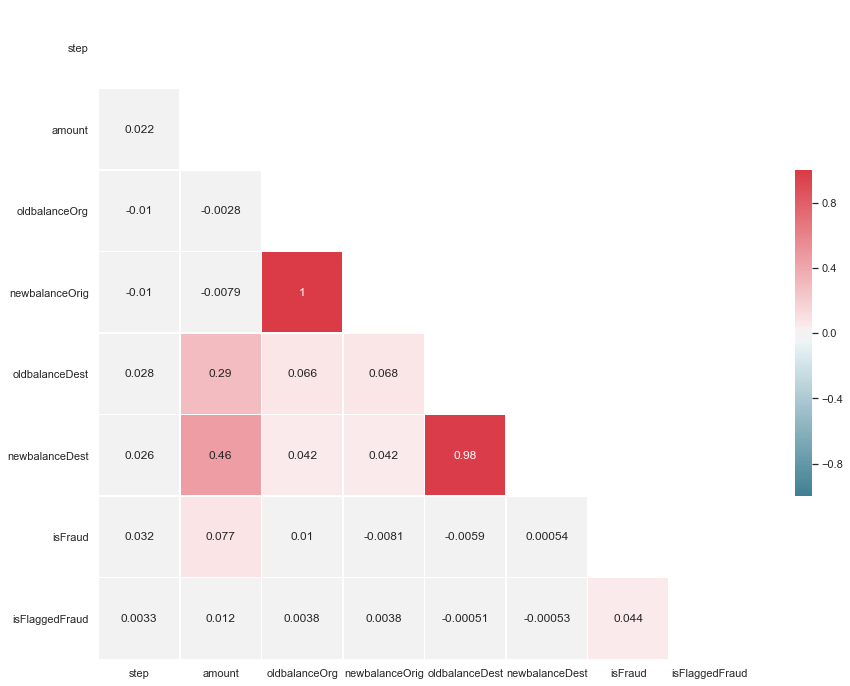

In [8]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

plt.show()

In [9]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

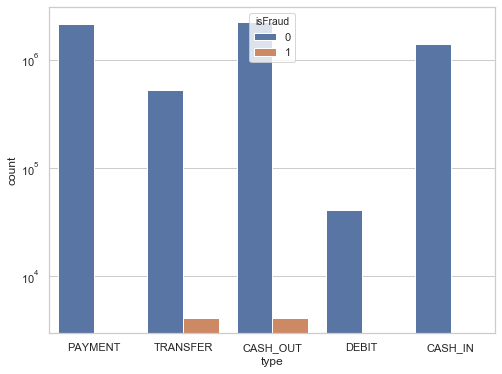

In [11]:
sns.set(style="whitegrid")

g = sns.countplot(data.type, hue=data.isFraud)
g.set_yscale("log")

In [12]:
data.loc[data.isFraud == 1].type.value_counts()

# We can see that Fraud appears only when the types are cash_out or transfer

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [13]:
"""
We can see from the value counts of the column 'isFraud' that the imbalance is very big in the dataset.
Fraud appears only when the types are CASH_OUT and TRANSFER.
"""

"\nWe can see from the value counts of the column 'isFraud' that the imbalance is very big in the dataset.\nFraud appears only when the types are CASH_OUT and TRANSFER.\n"

In [14]:
data.isnull().values.any()

False

In [15]:
data.step.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
725        4
245        4
655        4
112        2
662        2
Name: step, Length: 743, dtype: int64

### What is the distribution of the outcome? 

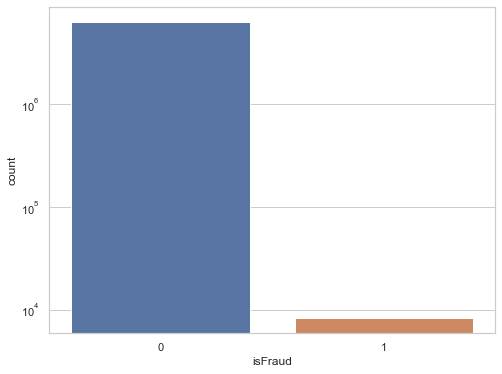

In [17]:
# Your response here

sns.set(style="whitegrid")

g = sns.countplot(data.isFraud)
g.set_yscale("log")

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [18]:
# Subsetting dataset to take out columns: nameOrig, nameDest. There are too many unique values, encoding is not possible.

data_clean = data.drop(['nameOrig', 'nameDest'], axis=1)

In [19]:
# Your code here

# Encoding column 'type':

data_dummy = pd.get_dummies(data_clean, drop_first=True)
data_dummy.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [20]:
X = data_dummy.drop(columns='isFraud')
y = data_dummy['isFraud']

In [21]:
print(f'Original dataset shape {data_dummy.shape}')

Original dataset shape (6362620, 12)


In [22]:
# Reshaping data to fix the imbalance of isFraud

from imblearn.under_sampling import NearMiss

nr = NearMiss()
X_res, y_res = nr.fit_sample(X, y)

Using TensorFlow backend.


In [23]:
print(f'Resampled dataset shape X: {len(X_res)}, Y: {len(y_res)}')

Resampled dataset shape X: 16426, Y: 16426


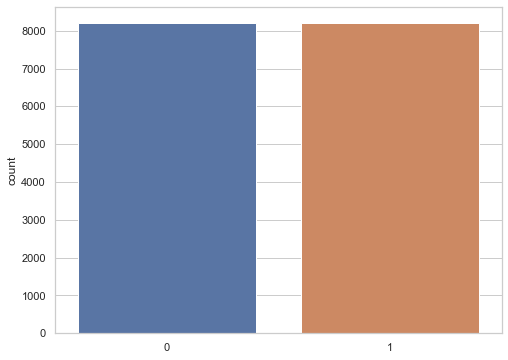

In [24]:
sns.countplot(y_res)
plt.show()

In [25]:
# Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, shuffle=True, stratify=y_res, random_state=42)

In [26]:
print(np.count_nonzero(y_test == 0))
print(np.count_nonzero(y_test == 1))

1643
1643


In [27]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_train = lr_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

y_pred_test = lr_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[6435  135]
 [ 155 6415]]
0.9779299847792998
[[1597   46]
 [  39 1604]]
0.9741326841144249


C:\Users\krist\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
"""
From 1643 we have TP 97.2%, TN 97.6%
"""

'\nFrom 1643 we have TP 97.2%, TN 97.6%\n'

### Now pick a model of your choice and evaluate its accuracy.

In [29]:
# Your code here

# Conducting KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

neighbors = 3
knn = KNeighborsClassifier(n_neighbors = neighbors)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

y_pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[6531   39]
 [  96 6474]]
0.9897260273972602
[[1627   16]
 [  48 1595]]
0.9805234327449787


In [30]:
"""
From 1643 we have TP 99.0%, TN 97.0%
"""

'\nFrom 1643 we have TP 99.0%, TN 97.0%\n'

### Which model worked better and how do you know?

In [31]:
# Your response here

"""
knn model worked a bit better. Accuracy score is higher with knn 98.1% vs 97.4% and:

With Logistic regression we had:
From 1643 we have TP 97.2%, TN 97.6%

With knn we had:
From 1643 we have TP 99.0%, TN 97.0%

"""

'\nknn model worked a bit better. Accuracy score is higher with knn 98.1% vs 97.4% and:\n\nWith Logistic regression we had:\nFrom 1643 we have TP 97.2%, TN 97.6%\n\nWith knn we had:\nFrom 1643 we have TP 99.0%, TN 97.0%\n\n'